**Step1: Preparing our books and data**

1- Import important libraries

In [5]:
#Install mlxtend which is a library of Python tools and extensions for data science.
%pip install mlxtend --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 27.9 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [6]:
#import nltk---->leading platform for building Python programs to work with human language data.
import nltk
nltk.download('punkt')    #downloading punctuations from NLTK
nltk.download("stopwords")  #download stopwords from NLTK
nltk.download("wordnet")  #downloading lemmatizers from NLTK
from nltk.corpus import gutenberg #a small selection of texts from the Project Gutenberg electronic text archive
from nltk.corpus import stopwords #importing stopwords
from nltk.stem import WordNetLemmatizer # algorithmic process of finding the lemma of a word depending on its meaning and context. 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [7]:
import math #This module provides access to the mathematical functions defined by the C standard.
import pandas as pd  #open source data analysis library 
import numpy as np   #a Python library used for working with arrays.
import re #a Python library used for working with regular expressions

In [8]:
import matplotlib.pyplot as plt #to make some plots to discover our data and results
import tensorflow as tf

In [9]:
from sklearn import preprocessing
from sklearn.utils import shuffle
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from mlxtend.evaluate import bias_variance_decomp


In [10]:
#Urllib package is the URL handling module for python. It is used to fetch URLs (Uniform Resource Locators). 
#It uses the urlopen function and is able to fetch URLs using a variety of different protocols.
from urllib import request 

collect differnt 5 books from one category and for differnt 5 authors

In [11]:
#combine all URLs of our historical books on a list 
BooksURLs = ["https://www.gutenberg.org/files/24654/24654-8.txt" ,
             "https://www.gutenberg.org/files/22153/22153-0.txt" ,
             "https://www.gutenberg.org/files/23691/23691-8.txt" ,
             "https://www.gutenberg.org/files/14400/14400-8.txt" ,
             "https://www.gutenberg.org/files/18931/18931-8.txt"]


In [12]:
#make a list of book names and make a label for every book
BooksNames = ["Chaldea",
              "Pagan and Christian Rome",
              "Archeological Expedition to Arizona in 1895",
              "Egyptian Archaeology",
              "Archeological Investigations"]
BooksLabels = ["a", "b" ,"c", "d" , "e"]

In [13]:
#make a list of book authors
BooksAuthors = ["Zénaïde A. Ragozin",
                "Rodolfo Lanciani",
                "Jesse Walter Fewkes",
                "Gaston Camille Charles Maspero",
                "Gerard Fowke"]

In [14]:
Books=[]

**Step2: preprocessing the data and data cleaning**

In [15]:
from urllib import request
#for loop to get every book in BooksURLs list
for URL  in BooksURLs :
  response = request.urlopen(URL)
  raw = response.read().decode('utf8' , errors = 'replace')
  wordsList= re.findall(r"[a-zA-Z]{3,}", raw)
  #perform lemmetization on the data
  lemmatizer = WordNetLemmatizer()
  lemmitizedWords =[]
  for i in wordsList:
    words = i.lower()
    word = lemmatizer.lemmatize(words)
    #check if the word not in stopwords set
    if word not in set(stopwords.words('english')):
      lemmitizedWords.append(str(word))
  Books.append(lemmitizedWords)

In [16]:
#to ensure that every book have 200 partition, and every partition have 100 words.
BooksWords = []  #to combine all words together
#for loop to get the book             
for i in Books:
  l = i[0:(math.floor(len(i)/100)) * 100]
  BooksWords.append(l)
#to combine all lists of the words on a single dataframe
result = pd.DataFrame()
for i in range(len(BooksWords)):
    df = {}
    list_of_partitions =  [BooksWords[i][x:x+100] for x in range(0, len(BooksWords[i]), 100)]
    #to combine Book Authors in one column
    df['Author_of_Book']= BooksAuthors[i]
    #to combine Book Names in one column
    df['Title_of_Book']= BooksNames[i] 
    #to combine Book Labels in one column
    df['Label_of_Book'] = BooksLabels[i]
    #to combine Book Partitions in one column
    df['PartitionsList'] = list_of_partitions 
    data = pd.DataFrame(df)
    #for loop to join our data together
    for i in range(len(data)):
      data["PartitionsList"][i] = " ".join(data["PartitionsList"][i])
    final_result = data[:200]
    result = result.append(final_result)
#shuffle the result of combining all dataframes together
result = shuffle(result)

In [17]:
#print head of data
result.head(5)

,Author_of_Book,Title_of_Book,Label_of_Book,PartitionsList
36,Gerard Fowke,Archeological Investigations,e,back foot come fallen rock foot little stream ...
150,Zénaïde A. Ragozin,Chaldea,a,lost first two call seth correctly sheth desce...
105,Gaston Camille Charles Maspero,Egyptian Archaeology,d,great wooden mast formed joined beam held plac...
191,Gaston Camille Charles Maspero,Egyptian Archaeology,d,limestone raised base supported four column co...
45,Rodolfo Lanciani,Pagan and Christian Rome,b,simplicius transforming basilica junius bassus...


In [18]:
#describe our result
result.describe()

,Author_of_Book,Title_of_Book,Label_of_Book,PartitionsList
count,1000,1000,1000,1000
unique,5,5,5,1000
top,Gerard Fowke,Archeological Investigations,e,back foot come fallen rock foot little stream ...
freq,200,200,200,1


In [19]:
#get some information about our result
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 36 to 173
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Author_of_Book  1000 non-null   object
 1   Title_of_Book   1000 non-null   object
 2   Label_of_Book   1000 non-null   object
 3   PartitionsList  1000 non-null   object
dtypes: object(4)
memory usage: 39.1+ KB


make a CountPlot to ensure that every book have 200 partition

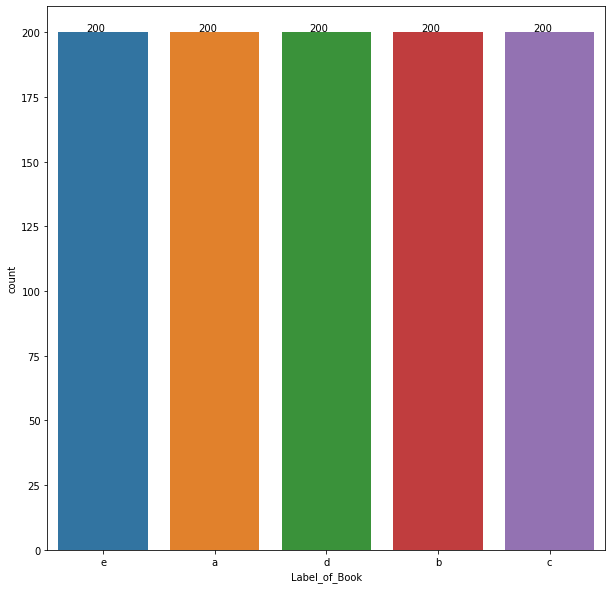

In [60]:
import seaborn as sns
plt.figure(figsize=(10,10))
ax = sns.countplot(x=result["Label_of_Book"],  data=result, order = result["Label_of_Book"].value_counts().index )
for p, label in zip(ax.patches, result["Label_of_Book"].value_counts()):   
    ax.annotate(label, (p.get_x()+0.25, p.get_height()+0.5))

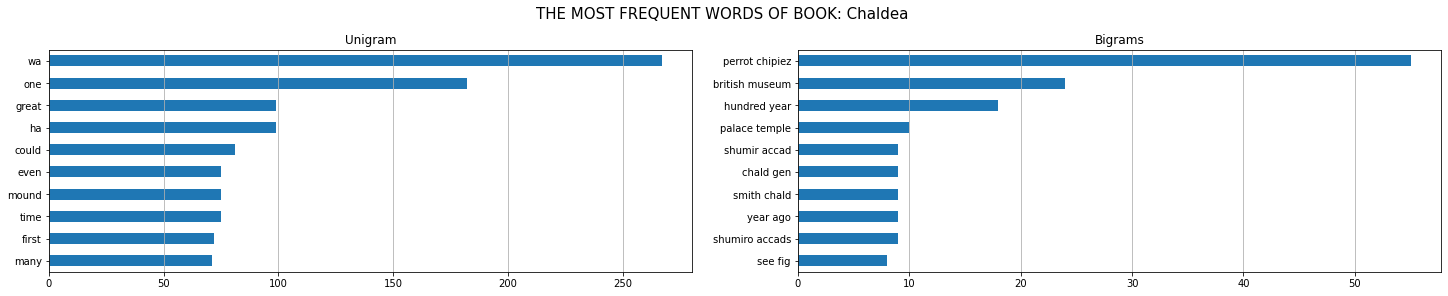

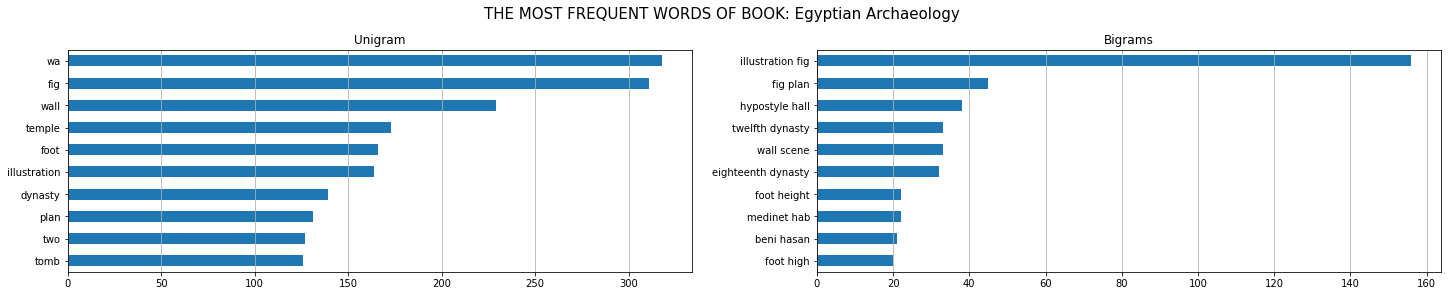

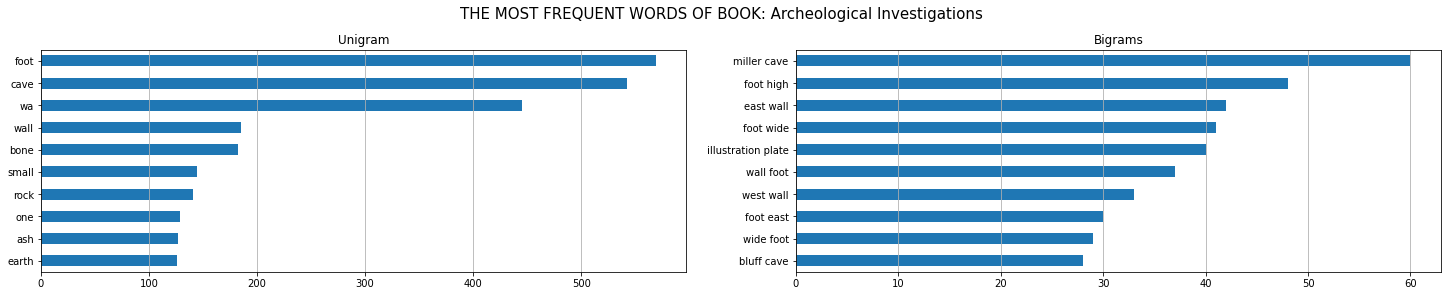

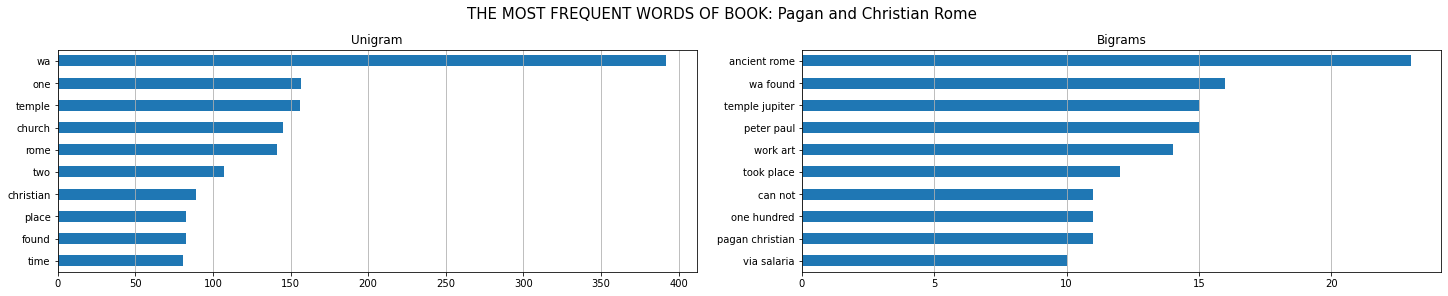

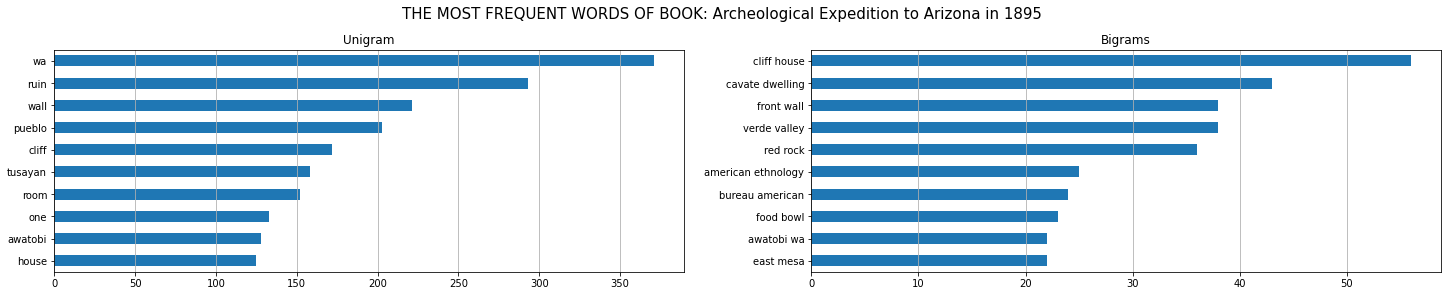

In [17]:
top= 10
for label in result['Title_of_Book'].unique():
    corpus = result[result["Title_of_Book"]==label]["PartitionsList"]
    lst_tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))
    fig, ax = plt.subplots(nrows=1, ncols=2,constrained_layout=True, figsize=(20, 4))
    fig.suptitle(f"THE MOST FREQUENT WORDS OF BOOK: {label} ", fontsize=15)

    #to draw the unigram gragh
    dic_words_freq = nltk.FreqDist(lst_tokens)
    result_unigram = pd.DataFrame(dic_words_freq.most_common(), 
                        columns=["Word","Freq"])
    result_unigram.set_index("Word").iloc[:10,:].sort_values(by="Freq").plot(
                    kind="barh", title="Unigram", ax=ax[0], 
                    legend=False).grid(axis='x')
    ax[0].set(ylabel=None)
    
    #to draw the bigram graph
    dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, 2))
    result_bigram = pd.DataFrame(dic_words_freq.most_common(), 
                        columns=["Word","Freq"])
    result_bigram["Word"] = result_bigram["Word"].apply(lambda x: " ".join(
                    string for string in x) )
    result_bigram.set_index("Word").iloc[:10,:].sort_values(by="Freq").plot(
                    kind="barh", title="Bigrams", ax=ax[1],
                    legend=False).grid(axis='x')
    ax[1].set(ylabel=None)

make a wordcloud figure to get the most frequent 50 words in every book


 THE MOST FREQUENT 50 WORDS OF BOOK CALLED: Chaldea



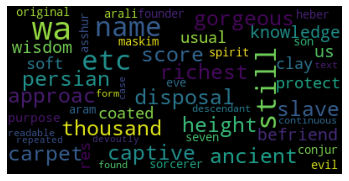


 THE MOST FREQUENT 50 WORDS OF BOOK CALLED: Egyptian Archaeology



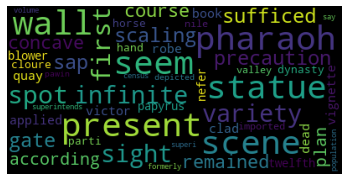


 THE MOST FREQUENT 50 WORDS OF BOOK CALLED: Archeological Investigations



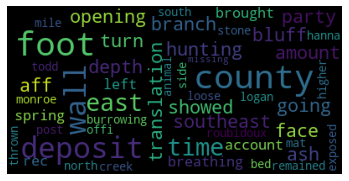


 THE MOST FREQUENT 50 WORDS OF BOOK CALLED: Pagan and Christian Rome



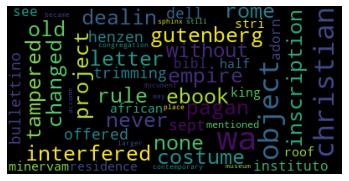


 THE MOST FREQUENT 50 WORDS OF BOOK CALLED: Archeological Expedition to Arizona in 1895



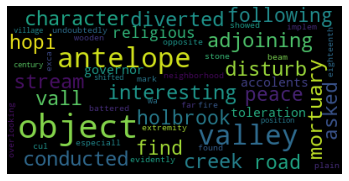

In [18]:
import wordcloud #Python wordcloud library to create tag clouds
import string
#for loop to take every unique book in the column of Title_of_Book 
for n in result['Title_of_Book'].unique():
  books = result[result["Title_of_Book"]==n]["PartitionsList"]
 #to print the most frequent 50 words of the unique book
  print(f"\n THE MOST FREQUENT 50 WORDS OF BOOK CALLED: {n}\n")
  WordCloudGragh = wordcloud.WordCloud(background_color='black', max_words=50, max_font_size=40)
  WordCloudGragh = WordCloudGragh.generate(str(books))
  plt.axis('off')
  plt.imshow(WordCloudGragh, cmap=None)
  plt.show()

Now, we can split our data and preparing it for training

In [19]:
#split dataset into subsets that minimize the potential for bias in your evaluation and validation process.
from sklearn.model_selection import train_test_split

In [20]:
x= np.array(result['PartitionsList'])
y=np.array(result['Label_of_Book'])

In [21]:
res_X_train, res_X_test, res_y_train, res_y_test = train_test_split(x, y, test_size= 0.3, random_state= 42)

**Step3: Perform Feature Engineering**

1- Build the Model

In [22]:
#from scikit learn library in python, we can draw the learning curve of the model
#to get more information------> https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
#function to draw the learning curve of every model
def DrawLearningCurve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0,5)): 
    #to draw the figure of the model
    plt.figure()
    #to write the title of the model
    plt.title(title)
    #ylim, Defines minimum and maximum y-values plotted
    if ylim is not None:
        plt.ylim(*ylim)
        #to define the labels names of the curve
    plt.xlabel("TRAINING DATASET")
    plt.ylabel("MODEL SCORE")

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    #to plot the learning curve
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, '-', color="r", label="Training score")
    
    plt.plot(train_sizes, test_scores_mean, '-', color="g", label="Cross-validation score")

    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='best');
    return plt


Importing important libraries for evaluate, accuracy, and confusion matrix for every model

In [23]:
from sklearn.model_selection import cross_val_score #to Evaluate a score by cross-validation.
from sklearn.model_selection import KFold #Provides train/test indices to split data in train/test sets. Split dataset into k consecutive folds (without shuffling by default).
from sklearn.metrics import confusion_matrix #to Compute confusion matrix to evaluate the accuracy of a classification.
from sklearn.metrics import accuracy_score #to compute Accuracy classification score.
from sklearn.metrics import classification_report #to Build a text report showing the main classification metrics.
from sklearn.metrics import plot_confusion_matrix #to polt the confusion matrix for visualization
from mlxtend.evaluate import bias_variance_decomp # for various loss functions.

In [24]:
#function to build the model, train and test the model, and apply K-fold cross validation 
def ModelBuilding(model, ModelName, X_train, X_test, y_train, y_test, cv ):
#define a variable to deal with each classification model
  global TrainingModel
  #to train the classification model
  TrainingModel = model.fit(X_train, y_train) 
  #to make prediction of X_test value and print the Classification report of the model
  global Model_Y_Prediction
  Model_Y_Prediction = model.predict(X_test)

#now we can apply k-fold validation 
  #calculate accuracy 
  accuracy = cross_val_score(estimator = model , X= X_train , y = y_train ,cv = cv)
  accuracy_avg = accuracy.mean()# measure the accuracy of the model (bais)
  test_accuracy = accuracy_score(y_test, Model_Y_Prediction)
  # Evaluate the model performance using metrics.accuracy_score to measure the score
  #print cross validation accuracy of every model
  print("THE CROSS VALIDATION ACCURACY IS: ", accuracy, "\n")
  #print average cross validation accuracy of every model
  print("THE AVERAGE CROSS VALIDATION ACCURACY IS: " , accuracy_avg, "\n")
  #print testing accuracy of every model
  print("THE TESTING ACCURACY IS: "  ,test_accuracy,"\n")
  #print classification report of every model
  print(classification_report(y_test, Model_Y_Prediction))
  # print Confusion Matrix of every model
  print('\nTHE CONFUSION MATRIS IS:\n')
  print(confusion_matrix(y_test, Model_Y_Prediction), "\n")
  plot_confusion_matrix(TrainingModel, X_test, y_test, xticks_rotation='vertical')
 #draw the learning curve of every model
  DrawLearningCurve(TrainingModel,"THE LEARNING CURVE OF: "+ ModelName,X_train, y_train, ylim=(0, 1.1), cv=cv, n_jobs=8)  
  print("\n")

Now we can calculate and predict where the prediction error

In [25]:
#function to predict the prediction error
def ErrorPrediction(X_train, y_train, X_test, y_test ,Model_Y_Prediction):
  TestLabels=np.array(y_test)
  ErrorsList  = [] 
  PredictionList = []
  RightLabel = []
  #for loop to predict the error while testing the model
  for i ,text in enumerate(res_X_test) :
    if Model_Y_Prediction[i] != TestLabels[i]:
      Errors = text
      ErrorsList.append(Errors)

      Truelabel = TestLabels[i]
      RightLabel.append(Truelabel)
      
      PredictedLabel = Model_Y_Prediction[i]
      PredictionList.append(PredictedLabel)
      #combine all in a new dataframe
  dataframmePrediction = pd.DataFrame()
  dataframmePrediction['Error'] = ErrorsList
  dataframmePrediction['Right Label']   = RightLabel
  dataframmePrediction['Predicted Label'] = PredictionList
#print which model did not classify well
  print("THE MODEL DID NOT CLASSIFY: " , len(ErrorsList), "\n")

  #make the label encoding
  label_encoder = preprocessing.LabelEncoder()

  X_train_copy = np.copy(X_train)
  X_test_copy = np.copy(X_test)
  y_train_copy = np.copy(y_train)
  y_test_copy = np.copy(y_test)
#calculate average bias and average variance of every classification model
  AverageExpectedLoss, AverageBias, AverageVariance = bias_variance_decomp(TrainingModel,
                                                              np.array(X_train_copy),
                                                              label_encoder.fit_transform(y_train_copy),
                                                              np.array(X_test_copy),
                                                              label_encoder.fit_transform(y_test_copy),
                                                              num_rounds=2, 
                                                              random_seed=123)
  #print average bias and average variance of every classification model
  print('THE AVERAGE BIAS IS: %.3f' % AverageBias, "\n")
  print('THE AVEARAGE VARIANCE IS: %.3f' % AverageVariance, "\n")
  print("\n")
  return dataframmePrediction 



**Step3: perform Bag Of Words (BOW) transformation and apply it to different 3 classification models**:

1.   Support vector machine(SVM) classification Model
2.   Decision Tree Classification Model
3.   KNN classification Model


In [26]:
from sklearn.feature_extraction.text import CountVectorizer #to Convert a collection of text documents to a matrix of token counts.

In [27]:
countVector= CountVectorizer()

A bag of words is a representation of text that describes the occurrence of words within a document. 

In [28]:
#perform BOW transformation on the partitionslist column
BOWVector = countVector.fit_transform(result['PartitionsList'])

In [29]:
BOW = pd.DataFrame(BOWVector.toarray(), columns=countVector.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [30]:
#print Bag Of Words
BOW

,aahhotep,aal,abacus,abandon,abandoned,abandonment,abbey,abd,abdomen,abel,...,zigzag,zimmern,zip,zodiac,zodiacal,zone,zosimus,zowyet,zuguato,zur
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


After performing Bow we can split result into train and test

In [31]:
BOW_X = BOWVector.toarray()
BOW_Y = result["Label_of_Book"]

In [32]:
#spliting the data
X_train, X_test, y_train, y_test = train_test_split(BOW_X, BOW_Y, test_size= 0.3, random_state= 42)

1- perform BOW transformation on SVM algorithm

In [33]:
#define the type of support vector machine algorithm
BagOfWords_SVM = svm.SVC(kernel='linear')

THE CROSS VALIDATION ACCURACY IS:  [0.97142857 0.95714286 0.98571429 0.98571429 0.97142857 1.
 0.95714286 0.98571429 1.         0.94285714] 

THE AVERAGE CROSS VALIDATION ACCURACY IS:  0.9757142857142858 

THE TESTING ACCURACY IS:  0.9766666666666667 

              precision    recall  f1-score   support

           a       0.90      1.00      0.95        57
           b       1.00      0.97      0.98        59
           c       0.98      1.00      0.99        58
           d       1.00      0.95      0.98        63
           e       1.00      0.97      0.98        63

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300


THE CONFUSION MATRIS IS:

[[57  0  0  0  0]
 [ 2 57  0  0  0]
 [ 0  0 58  0  0]
 [ 3  0  0 60  0]
 [ 1  0  1  0 61]] 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


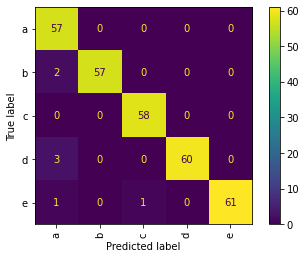

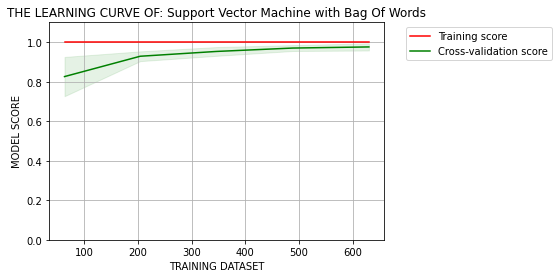

In [34]:
ModelBuilding(BagOfWords_SVM,"Support Vector Machine with Bag Of Words", X_train, X_test, y_train, y_test ,10)

In [35]:
BagOfWords_SVM_Error = ErrorPrediction(X_train, y_train, X_test, y_test ,Model_Y_Prediction)

THE MODEL DID NOT CLASSIFY:  7 

THE AVERAGE BIAS IS: 0.030 

THE AVEARAGE VARIANCE IS: 0.005 





In [36]:
display(BagOfWords_SVM_Error.head())

,Error,Right Label,Predicted Label
0,survived day pro sangvine nomen animalis coriv...,b,a
1,project gutenberg ebook archeological investig...,e,c
2,task would difficult imagine point work scope ...,d,a
3,day even whole day brick piled stack wise air ...,d,a
4,worship devotion also hydro therapeutic establ...,b,a


**Apply Decision-Tree algorithm on BOW Transformation**

In [37]:
# Train Decision Tree Classifer
from sklearn.datasets import load_iris #is a classic and very easy multi-class classification dataset.
from sklearn import tree #non-parametric supervised learning method used for classification and regression.

In [38]:
BagOfWords_DT = DecisionTreeClassifier(random_state=0, max_depth= 10, criterion= 'entropy', min_samples_leaf= 1)

THE CROSS VALIDATION ACCURACY IS:  [0.8        0.71428571 0.74285714 0.82857143 0.7        0.74285714
 0.8        0.75714286 0.77142857 0.78571429] 

THE AVERAGE CROSS VALIDATION ACCURACY IS:  0.7642857142857142 

THE TESTING ACCURACY IS:  0.8 

              precision    recall  f1-score   support

           a       0.58      0.86      0.70        57
           b       0.83      0.81      0.82        59
           c       0.84      0.83      0.83        58
           d       0.91      0.67      0.77        63
           e       0.96      0.84      0.90        63

    accuracy                           0.80       300
   macro avg       0.83      0.80      0.80       300
weighted avg       0.83      0.80      0.81       300


THE CONFUSION MATRIS IS:

[[49  2  1  4  1]
 [10 48  1  0  0]
 [ 8  1 48  0  1]
 [12  7  2 42  0]
 [ 5  0  5  0 53]] 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


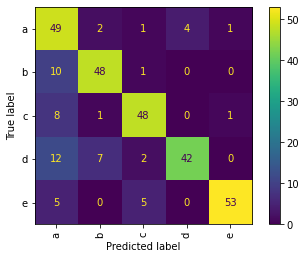

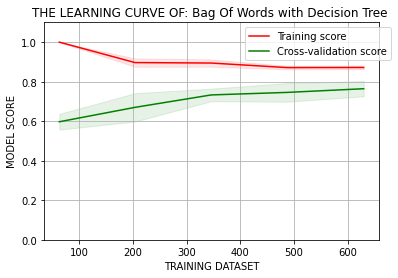

In [39]:
ModelBuilding(BagOfWords_DT,"Bag Of Words with Decision Tree ", X_train, X_test, y_train, y_test ,10)

In [40]:
BagOfWords_DT_Error = ErrorPrediction(X_train, y_train, X_test, y_test ,Model_Y_Prediction)

THE MODEL DID NOT CLASSIFY:  60 

THE AVERAGE BIAS IS: 0.240 

THE AVEARAGE VARIANCE IS: 0.093 





In [41]:
display(BagOfWords_DT_Error.head())

,Error,Right Label,Predicted Label
0,haunted spirit proved happened many month ago ...,b,a
1,sent present friend wa course impossible case ...,b,a
2,square chamber filled rubbish completes plan w...,d,b
3,survived day pro sangvine nomen animalis coriv...,b,a
4,bring trophy next scene peace behold pharaoh p...,d,b


**Apply KNN algorithm with BOW Transformation**

In [42]:
#Classifier implementing the k-nearest neighbors vote.
from sklearn.neighbors import KNeighborsClassifier

In [43]:
BagOfWords_KNN = KNeighborsClassifier(n_neighbors = 3, algorithm= 'kd_tree', p= 1)

THE CROSS VALIDATION ACCURACY IS:  [0.95714286 0.97142857 0.98571429 0.98571429 0.95714286 1.
 0.97142857 0.97142857 0.94285714 0.92857143] 

THE AVERAGE CROSS VALIDATION ACCURACY IS:  0.9671428571428573 

THE TESTING ACCURACY IS:  0.9666666666666667 

              precision    recall  f1-score   support

           a       0.92      0.98      0.95        57
           b       1.00      0.88      0.94        59
           c       1.00      1.00      1.00        58
           d       0.95      0.98      0.97        63
           e       0.97      0.98      0.98        63

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300


THE CONFUSION MATRIS IS:

[[56  0  0  1  0]
 [ 3 52  0  2  2]
 [ 0  0 58  0  0]
 [ 1  0  0 62  0]
 [ 1  0  0  0 62]] 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


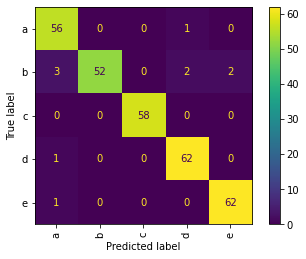

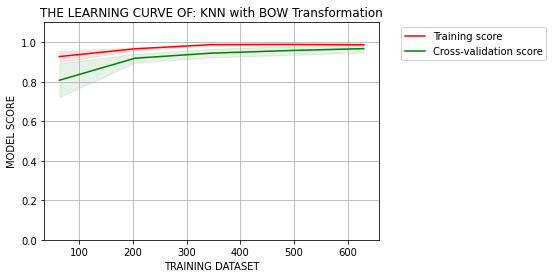

In [44]:
ModelBuilding(BagOfWords_KNN,"KNN with BOW Transformation", X_train, X_test, y_train, y_test ,10)

In [45]:

BafOfWords_KNN_Error = ErrorPrediction(X_train, y_train, X_test, y_test ,Model_Y_Prediction)

THE MODEL DID NOT CLASSIFY:  10 

THE AVERAGE BIAS IS: 0.067 

THE AVEARAGE VARIANCE IS: 0.030 





In [46]:
display(BafOfWords_KNN_Error.head())

,Error,Right Label,Predicted Label
0,sent present friend wa course impossible case ...,b,d
1,survived day pro sangvine nomen animalis coriv...,b,d
2,project gutenberg ebook archeological investig...,e,a
3,fragment melt handle knife farm isola farnese ...,b,a
4,reaction caused final outburst fanaticism must...,b,e


**Step4:  perform TF-IDF transformation and apply it to different 3 classification models**

1.   Support vector machine(SVM) classification Model
2.   Decision Tree Classification Model
3.   KNN classification Model



In [47]:
#to Convert a collection of raw documents to a matrix of TF-IDF features.
from sklearn.feature_extraction.text import TfidfVectorizer

In [48]:
vectorizer = TfidfVectorizer()

Term frequency (TF) vectors show how important words are to documents. They are computed by using: 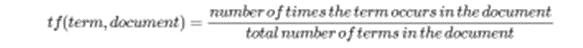

In [49]:
#to Transform result to document-term matrix.
TFIDF = vectorizer.fit_transform(result['PartitionsList'])

In [50]:
#transform it to array
TFIDF_Vector = pd.DataFrame(TFIDF.toarray(), columns=vectorizer.get_feature_names())


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [51]:
#print the TF-IDF vector
TFIDF_Vector

,aahhotep,aal,abacus,abandon,abandoned,abandonment,abbey,abd,abdomen,abel,...,zigzag,zimmern,zip,zodiac,zodiacal,zone,zosimus,zowyet,zuguato,zur
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now, we can split our result to train and test after performing TF-IDF transformation

In [52]:
TFIDF_X= TFIDF.toarray()
TFIDF_Y = result['Label_of_Book']

In [53]:
#Split the data into train and test
TFIDF_X_train, TFIDF_X_test, TFIDF_Y_train, TFIDF_Y_test = train_test_split(TFIDF_X, TFIDF_Y, test_size= 0.3, random_state= 42)

In [54]:
TFIDF_X_train.shape

(700, 12168)

In [55]:
TFIDF_X_test.shape

(300, 12168)

In [56]:
TFIDF_Y_train.shape

(700,)

In [57]:
TFIDF_Y_test.shape

(300,)

Apply support vector machine (SVM) classifier on TF-IDF Transformation

In [58]:
TFIDF_SVM = svm.SVC(kernel='sigmoid')

THE CROSS VALIDATION ACCURACY IS:  [1.         0.97142857 0.98571429 0.98571429 0.95714286 1.
 0.95714286 0.98571429 1.         0.97142857] 

THE AVERAGE CROSS VALIDATION ACCURACY IS:  0.9814285714285715 

THE TESTING ACCURACY IS:  0.9866666666666667 

              precision    recall  f1-score   support

           a       0.93      1.00      0.97        57
           b       1.00      1.00      1.00        59
           c       1.00      1.00      1.00        58
           d       1.00      0.95      0.98        63
           e       1.00      0.98      0.99        63

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300


THE CONFUSION MATRIS IS:

[[57  0  0  0  0]
 [ 0 59  0  0  0]
 [ 0  0 58  0  0]
 [ 3  0  0 60  0]
 [ 1  0  0  0 62]] 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


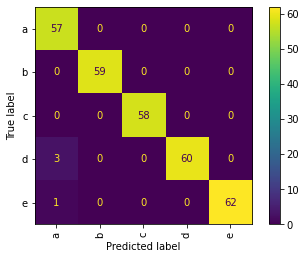

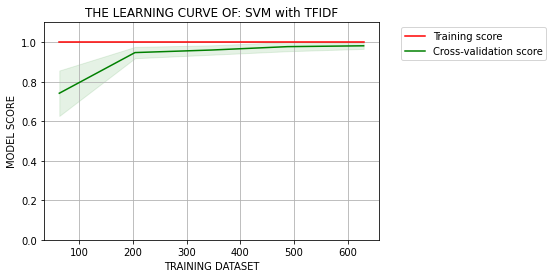

In [59]:
ModelBuilding(TFIDF_SVM, "SVM with TFIDF", TFIDF_X_train, TFIDF_X_test, TFIDF_Y_train, TFIDF_Y_test ,10)

In [60]:
TFIDF_SVM_Error  = ErrorPrediction(TFIDF_X_train, TFIDF_Y_train, TFIDF_X_test, TFIDF_Y_test ,Model_Y_Prediction)

THE MODEL DID NOT CLASSIFY:  4 

THE AVERAGE BIAS IS: 0.030 

THE AVEARAGE VARIANCE IS: 0.008 





In [61]:
display(TFIDF_SVM_Error.head())

,Error,Right Label,Predicted Label
0,project gutenberg ebook archeological investig...,e,a
1,task would difficult imagine point work scope ...,d,a
2,day even whole day brick piled stack wise air ...,d,a
3,new edition revised enlarged author three hund...,d,a


Apply Decision Tree on TF-IDF Tranformation



In [62]:
TFIDF_DT = DecisionTreeClassifier(random_state=0, max_depth= 10)

THE CROSS VALIDATION ACCURACY IS:  [0.77142857 0.71428571 0.74285714 0.84285714 0.74285714 0.72857143
 0.8        0.77142857 0.77142857 0.74285714] 

THE AVERAGE CROSS VALIDATION ACCURACY IS:  0.7628571428571429 

THE TESTING ACCURACY IS:  0.7933333333333333 

              precision    recall  f1-score   support

           a       0.55      0.82      0.66        57
           b       0.85      0.76      0.80        59
           c       0.91      0.83      0.86        58
           d       0.91      0.67      0.77        63
           e       0.89      0.89      0.89        63

    accuracy                           0.79       300
   macro avg       0.82      0.79      0.80       300
weighted avg       0.83      0.79      0.80       300


THE CONFUSION MATRIS IS:

[[47  2  3  4  1]
 [12 45  1  0  1]
 [ 8  1 48  0  1]
 [11  5  1 42  4]
 [ 7  0  0  0 56]] 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


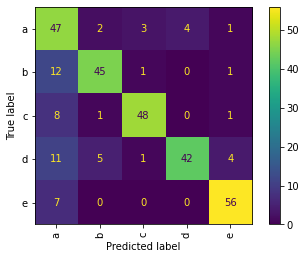

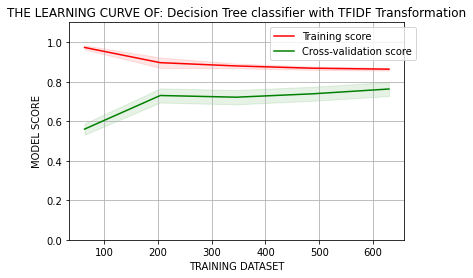

In [63]:
ModelBuilding(TFIDF_DT, "Decision Tree classifier with TFIDF Transformation",  TFIDF_X_train, TFIDF_X_test, TFIDF_Y_train, TFIDF_Y_test ,10)

In [64]:
TFIDF_DT_Error = ErrorPrediction(TFIDF_X_train, TFIDF_Y_train, TFIDF_X_test, TFIDF_Y_test, Model_Y_Prediction)

THE MODEL DID NOT CLASSIFY:  62 

THE AVERAGE BIAS IS: 0.267 

THE AVEARAGE VARIANCE IS: 0.095 





In [65]:
display(TFIDF_DT_Error.head())

,Error,Right Label,Predicted Label
0,haunted spirit proved happened many month ago ...,b,a
1,bowl footnote appendix index illustration plat...,c,a
2,sent present friend wa course impossible case ...,b,c
3,square chamber filled rubbish completes plan w...,d,c
4,survived day pro sangvine nomen animalis coriv...,b,a


Apply KNN Classification model on TF-IDF Tranformation

In [66]:
TFIDF_KNN =  KNeighborsClassifier(n_neighbors = 5, algorithm= 'kd_tree', p=2)

THE CROSS VALIDATION ACCURACY IS:  [0.92857143 0.97142857 1.         0.95714286 0.94285714 0.97142857
 0.95714286 0.94285714 0.94285714 0.97142857] 

THE AVERAGE CROSS VALIDATION ACCURACY IS:  0.9585714285714285 

THE TESTING ACCURACY IS:  0.9633333333333334 

              precision    recall  f1-score   support

           a       0.95      0.95      0.95        57
           b       1.00      0.90      0.95        59
           c       0.95      1.00      0.97        58
           d       0.95      0.98      0.97        63
           e       0.97      0.98      0.98        63

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300


THE CONFUSION MATRIS IS:

[[54  0  1  2  0]
 [ 2 53  1  1  2]
 [ 0  0 58  0  0]
 [ 1  0  0 62  0]
 [ 0  0  1  0 62]] 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


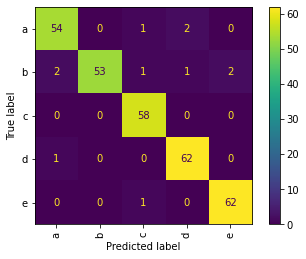

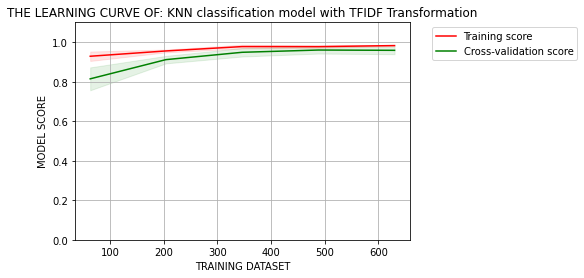

In [67]:
ModelBuilding(TFIDF_KNN, "KNN classification model with TFIDF Transformation", TFIDF_X_train, TFIDF_X_test, TFIDF_Y_train, TFIDF_Y_test ,10)

In [68]:
TFIDF_KNN_Error = ErrorPrediction(TFIDF_X_train, TFIDF_Y_train, TFIDF_X_test, TFIDF_Y_test, Model_Y_Prediction)

THE MODEL DID NOT CLASSIFY:  11 

THE AVERAGE BIAS IS: 0.063 

THE AVEARAGE VARIANCE IS: 0.038 





In [69]:
display(TFIDF_KNN_Error.head())

,Error,Right Label,Predicted Label
0,haunted spirit proved happened many month ago ...,b,a
1,sent present friend wa course impossible case ...,b,d
2,survived day pro sangvine nomen animalis coriv...,b,a
3,project gutenberg ebook archeological investig...,e,c
4,lower basilica parenzo dalmatia divided mosaic...,b,e


**Step5:  perform N-gram transformation and apply it to different 3 classification models**

1.   Support vector machine(SVM) classification Model
2.   Decision Tree Classification Model
3.   KNN classification Model


N-grams are continuous sequences of words or symbols or tokens in a document. In technical terms, they can be defined as the neighbouring sequences of items in a document

In [70]:
N_Gram_Vectorizer = CountVectorizer(ngram_range=(2,2))

In [71]:
N_Gram= N_Gram_Vectorizer.fit_transform(result['PartitionsList'])

In [72]:
N_Gram_Vector = pd.DataFrame(N_Gram.toarray(), columns = N_Gram_Vectorizer.get_feature_names() )

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [73]:
N_Gram_Vector

,aahhotep battle,aahhotep eighteenth,aahhotep funerary,aahhotep ring,aal wall,abacus carelessness,abacus fig,abacus hidden,abacus join,abandon congenial,...,zip chaldea,zip http,zodiac fashioned,zodiacal circle,zone pueblo,zosimus carmen,zowyet aryan,zuguato hinton,zur frage,zur semitischen
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now, we can split our result to train and test after performing N-Gram transformation


In [74]:
N_Gram_X= TFIDF.toarray()
N_Gram_Y = result['Label_of_Book']

In [75]:
#Split the data into train and test
N_Gram_X_train, N_Gram_X_test, N_Gram_Y_train, N_Gram_Y_test = train_test_split(N_Gram_X, N_Gram_Y, test_size= 0.3, random_state= 42)

In [76]:
N_Gram_X_train.shape

(700, 12168)

Apply support vector machine (SVM) classifier on N_Gram Transformation

In [77]:
N_Gram_SVM = svm.SVC(kernel='linear')

THE CROSS VALIDATION ACCURACY IS:  [1.         0.97142857 0.98571429 0.98571429 0.95714286 1.
 0.94285714 0.98571429 1.         0.97142857] 

THE AVERAGE CROSS VALIDATION ACCURACY IS:  0.9800000000000001 

THE TESTING ACCURACY IS:  0.99 

              precision    recall  f1-score   support

           a       0.95      1.00      0.97        57
           b       1.00      1.00      1.00        59
           c       1.00      1.00      1.00        58
           d       1.00      0.97      0.98        63
           e       1.00      0.98      0.99        63

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300


THE CONFUSION MATRIS IS:

[[57  0  0  0  0]
 [ 0 59  0  0  0]
 [ 0  0 58  0  0]
 [ 2  0  0 61  0]
 [ 1  0  0  0 62]] 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


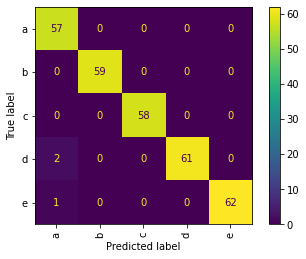

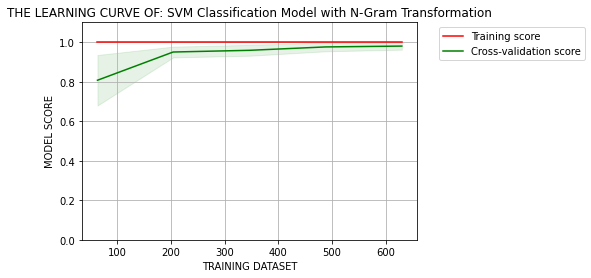

In [78]:
ModelBuilding(N_Gram_SVM, "SVM Classification Model with N-Gram Transformation", N_Gram_X_train, N_Gram_X_test, N_Gram_Y_train, N_Gram_Y_test ,10)

In [79]:
N_Gram_SVM_Error  = ErrorPrediction(N_Gram_X_train, N_Gram_Y_train, N_Gram_X_test, N_Gram_Y_test ,Model_Y_Prediction)

THE MODEL DID NOT CLASSIFY:  3 

THE AVERAGE BIAS IS: 0.030 

THE AVEARAGE VARIANCE IS: 0.005 





In [80]:
display(N_Gram_SVM_Error.head())

,Error,Right Label,Predicted Label
0,project gutenberg ebook archeological investig...,e,a
1,task would difficult imagine point work scope ...,d,a
2,day even whole day brick piled stack wise air ...,d,a


Apply Decision Tree on `N_Gram` Tranformation


In [81]:
N_Gram_DT = DecisionTreeClassifier(random_state=0, max_depth= 10)

THE CROSS VALIDATION ACCURACY IS:  [0.77142857 0.71428571 0.74285714 0.84285714 0.74285714 0.72857143
 0.8        0.77142857 0.77142857 0.74285714] 

THE AVERAGE CROSS VALIDATION ACCURACY IS:  0.7628571428571429 

THE TESTING ACCURACY IS:  0.7933333333333333 

              precision    recall  f1-score   support

           a       0.55      0.82      0.66        57
           b       0.85      0.76      0.80        59
           c       0.91      0.83      0.86        58
           d       0.91      0.67      0.77        63
           e       0.89      0.89      0.89        63

    accuracy                           0.79       300
   macro avg       0.82      0.79      0.80       300
weighted avg       0.83      0.79      0.80       300


THE CONFUSION MATRIS IS:

[[47  2  3  4  1]
 [12 45  1  0  1]
 [ 8  1 48  0  1]
 [11  5  1 42  4]
 [ 7  0  0  0 56]] 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


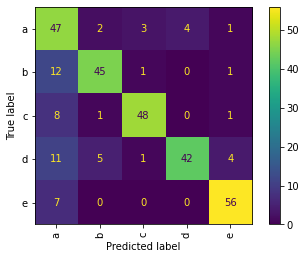

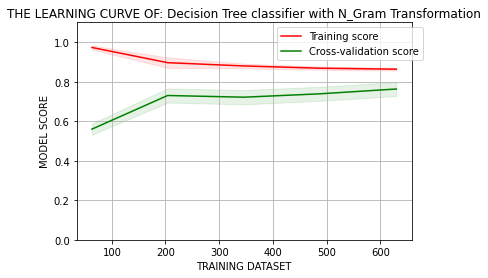

In [82]:
ModelBuilding(N_Gram_DT, "Decision Tree classifier with N_Gram Transformation",  N_Gram_X_train, N_Gram_X_test, N_Gram_Y_train, N_Gram_Y_test ,10)

In [83]:
N_Gram_DT_Error = ErrorPrediction(N_Gram_X_train, N_Gram_Y_train, N_Gram_X_test, N_Gram_Y_test, Model_Y_Prediction)

THE MODEL DID NOT CLASSIFY:  62 

THE AVERAGE BIAS IS: 0.267 

THE AVEARAGE VARIANCE IS: 0.095 





In [84]:
display(N_Gram_DT_Error)

,Error,Right Label,Predicted Label
0,haunted spirit proved happened many month ago ...,b,a
1,bowl footnote appendix index illustration plat...,c,a
2,sent present friend wa course impossible case ...,b,c
3,square chamber filled rubbish completes plan w...,d,c
4,survived day pro sangvine nomen animalis coriv...,b,a
...,...,...,...
57,flat roof stood three foot higher rampart pass...,d,e
58,side circus traced precision help classical pa...,b,a
59,twelfth dynasty chest construction mummy case ...,d,a
60,taken place skin mouth upward case burst requi...,a,d


Apply KNN classification model on `N_Gram` Tranformation


In [85]:
N_Gram_KNN =  KNeighborsClassifier(n_neighbors = 5, algorithm= 'kd_tree', p=2)

THE CROSS VALIDATION ACCURACY IS:  [0.92857143 0.97142857 1.         0.95714286 0.94285714 0.97142857
 0.95714286 0.94285714 0.94285714 0.97142857] 

THE AVERAGE CROSS VALIDATION ACCURACY IS:  0.9585714285714285 

THE TESTING ACCURACY IS:  0.9633333333333334 

              precision    recall  f1-score   support

           a       0.95      0.95      0.95        57
           b       1.00      0.90      0.95        59
           c       0.95      1.00      0.97        58
           d       0.95      0.98      0.97        63
           e       0.97      0.98      0.98        63

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300


THE CONFUSION MATRIS IS:

[[54  0  1  2  0]
 [ 2 53  1  1  2]
 [ 0  0 58  0  0]
 [ 1  0  0 62  0]
 [ 0  0  1  0 62]] 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


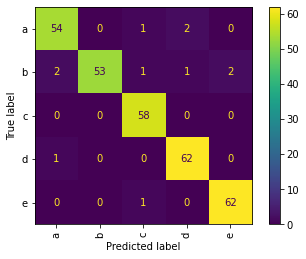

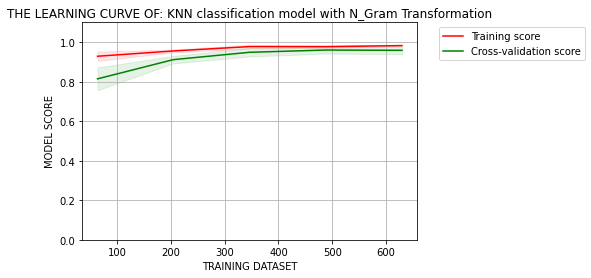

In [86]:
ModelBuilding(N_Gram_KNN, "KNN classification model with N_Gram Transformation", N_Gram_X_train, N_Gram_X_test, N_Gram_Y_train, N_Gram_Y_test ,10)

In [87]:
N_Gram_KNN_Error = ErrorPrediction(N_Gram_X_train, N_Gram_Y_train, N_Gram_X_test, N_Gram_Y_test, Model_Y_Prediction)

THE MODEL DID NOT CLASSIFY:  11 

THE AVERAGE BIAS IS: 0.063 

THE AVEARAGE VARIANCE IS: 0.038 





In [88]:
display(N_Gram_KNN_Error)

,Error,Right Label,Predicted Label
0,haunted spirit proved happened many month ago ...,b,a
1,sent present friend wa course impossible case ...,b,d
2,survived day pro sangvine nomen animalis coriv...,b,a
3,project gutenberg ebook archeological investig...,e,c
4,lower basilica parenzo dalmatia divided mosaic...,b,e
5,awkward place could hardly answer purpose acco...,b,e
6,day even whole day brick piled stack wise air ...,d,a
7,worship devotion also hydro therapeutic establ...,b,c
8,half smaller slightly convex inch long one two...,a,c
9,height gorgeous richest persian carpet approac...,a,d


**Step6: choose the champion model**

**After implementing the 3 algorithms, we can say that----> the champion model is SVM classification Model with TF-IDF transformation**, 
**IT has the highest accuracy and the lowest Bias and Variance**

In [89]:
#Change the kernel type and degree make the accuracy go down
SVM_TFIDF_Low = svm.SVC(kernel = 'poly', max_iter= 3)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider

THE CROSS VALIDATION ACCURACY IS:  [0.78571429 0.67142857 0.75714286 0.81428571 0.62857143 0.67142857
 0.75714286 0.64285714 0.77142857 0.61428571] 

THE AVERAGE CROSS VALIDATION ACCURACY IS:  0.7114285714285714 

THE TESTING ACCURACY IS:  0.7833333333333333 

              precision    recall  f1-score   support

           a       0.70      0.67      0.68        57
           b       0.85      0.80      0.82        59
           c       0.91      0.83      0.86        58
           d       0.92      0.71      0.80        63
           e       0.64      0.90      0.75        63

    accuracy                           0.78       300
   macro avg       0.80      0.78      0.79       300
weighted avg       0.80      0.78      0.79       300


THE CONFUSION MATRIS IS:

[[38  3  0  1 15]
 [ 5 47  1  2  4]
 [ 3  0 48  0  7]
 [ 6  5  1 45  6]
 [ 2  0  3  1 57]] 





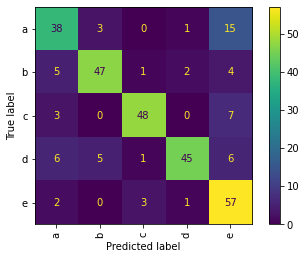

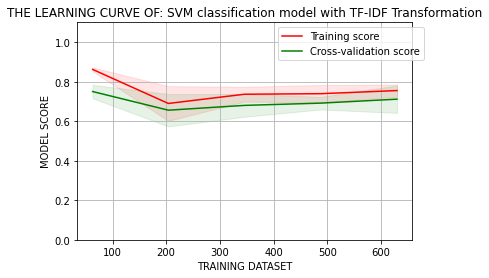

In [90]:
ModelBuilding(SVM_TFIDF_Low, "SVM classification model with TF-IDF Transformation", TFIDF_X_train, TFIDF_X_test, TFIDF_Y_train, TFIDF_Y_test ,10)

In [91]:
SVM_TFIDF_Low_Error  = ErrorPrediction(TFIDF_X_train, TFIDF_Y_train, TFIDF_X_test, TFIDF_Y_test ,Model_Y_Prediction)

THE MODEL DID NOT CLASSIFY:  65 



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


THE AVERAGE BIAS IS: 0.343 

THE AVEARAGE VARIANCE IS: 0.155 





/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


In [92]:
display(SVM_TFIDF_Low_Error)

,Error,Right Label,Predicted Label
0,sent present friend wa course impossible case ...,b,d
1,survived day pro sangvine nomen animalis coriv...,b,a
2,back expedition wa catalogued entry numbering ...,c,e
3,every nook cranny bringing light ugly thing hi...,a,b
4,distinguished assyrian one curious peculiarity...,a,e
...,...,...,...
60,twelfth dynasty chest construction mummy case ...,d,b
61,wind perrot chipiez class belongs small bronze...,a,e
62,taken place skin mouth upward case burst requi...,a,e
63,palestrina technical process preparation surfa...,d,e


**Step7: Perform Error Analysis**

perform Error Analysis on the champion model (SVM with TF-IDF)

In [93]:
TFIDF_SVM_Error

,Error,Right Label,Predicted Label
0,project gutenberg ebook archeological investig...,e,a
1,task would difficult imagine point work scope ...,d,a
2,day even whole day brick piled stack wise air ...,d,a
3,new edition revised enlarged author three hund...,d,a


The svm model can't predict 8 columns, the error is in classes"d,c,e".

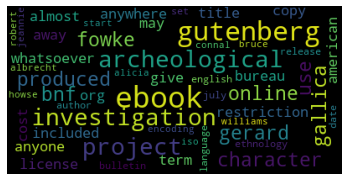

In [94]:
#print the most frequent words of error in index 0
wc = wordcloud.WordCloud(background_color='black', max_words=50, max_font_size=35)
wc = wc.generate(TFIDF_SVM_Error['Error'][0])
plt.axis('off')
plt.imshow(wc, cmap=None)
plt.show()


In [95]:
#print error words for index 0 of misclassified TF-IDF transformation and SVM model
TFIDF_SVM_Error['Error'][0]

'project gutenberg ebook archeological investigation gerard fowke ebook use anyone anywhere cost almost restriction whatsoever may copy give away use term project gutenberg license included ebook online www gutenberg org title archeological investigation bureau american ethnology bulletin author gerard fowke release date july ebook language english character set encoding iso start project gutenberg ebook archeological investigation produced robert connal jeannie howse alicia williams bruce albrecht online distributed proofreading team http www pgdp net file wa produced image generously made available biblioth que nationale france bnf gallica http gallica bnf transcriber note inconsistent hyphenation match original document text contains character le'

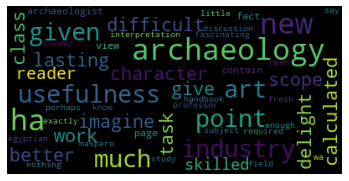

In [96]:
#print the most frequent words of error in index 1
wc = wordcloud.WordCloud(background_color='black', max_words=50, max_font_size=35)
wc = wc.generate(TFIDF_SVM_Error['Error'][1])
plt.axis('off')
plt.imshow(wc, cmap=None)
plt.show()

In [97]:
#print error words for index 1 of misclassified TF-IDF transformation and SVM model
TFIDF_SVM_Error['Error'][1]

'task would difficult imagine point work scope character better calculated give lasting delight class reader skilled archaeologist page contain new fact new view new interpretation know little perhaps nothing subject discussion open fresh fascinating field study enough say handbook egyptian archaeology wa much needed professor maspero ha given exactly required ha done much ha given picturesque vivacious highly original volume delightful learned instructive dull regard practical side archaeology ought unnecessary point usefulness strictly parallel usefulness public museum collect exhibit object ancient art industry worse idle also endeavour disseminate knowledge history art industry process employed artist craftsman past archaeology le love'

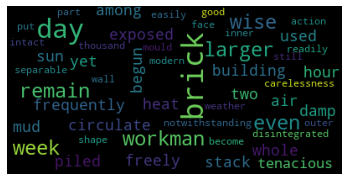

In [98]:
#print the most frequent words of error in index 2
wc = wordcloud.WordCloud(background_color='black', max_words=50, max_font_size=35)
wc = wc.generate(TFIDF_SVM_Error['Error'][2])
plt.axis('off')
plt.imshow(wc, cmap=None)
plt.show()

In [99]:
#print error words for index 2 of misclassified TF-IDF transformation and SVM model
TFIDF_SVM_Error['Error'][2]

'day even whole day brick piled stack wise air circulate freely among remain week two used frequently however exposed hour heat sun building begun yet damp mud however tenacious notwithstanding carelessness readily put shape outer face brick become disintegrated action weather inner part wall remain intact still separable good modern workman easily mould thousand brick day week practice may turn even ancient workman whose appliance wise differed present day produced equally satisfactory result dimension generally adopted inch ordinary brick larger size note though larger smaller often met ruin brick issued royal workshop sometimes stamped cartouch reigning monarch made private factory'

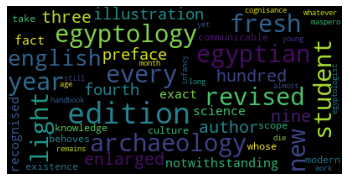

In [100]:
#print the most frequent words of error in index 3
wc = wordcloud.WordCloud(background_color='black', max_words=50, max_font_size=35)
wc = wc.generate(TFIDF_SVM_Error['Error'][3])
plt.axis('off')
plt.imshow(wc, cmap=None)
plt.show()

In [110]:
#print error words for index 3 of misclassified TF-IDF transformation and SVM model
TFIDF_SVM_Error['Error'][3]

'new edition revised enlarged author three hundred nine illustration preface fourth revised edition notwithstanding fact egyptology recognised science exact communicable knowledge whose existence scope behoves modern culture take cognisance work maspero still remains handbook egyptian archaeology egyptology yet infancy whatever age egyptologist long die young every year almost every month fresh material study found fresh light thrown upon progress excavation exploration research hence follows course year standard text book require considerable addition modification greatest value student must always start foremost vantage ground increasing demand egyptian archaeology english american tourist well student decided english publisher issue new edition light portable form'

#Trying to do Data augmentation with reinforcement learning

In [1]:
#install numpy requests for data augmentation
!pip install numpy requests nlpaug

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 410 kB 19.4 MB/s 


In [2]:
#to install data augmentation from github
!pip install numpy git+https://github.com/makcedward/nlpaug.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/makcedward/nlpaug.git to /tmp/pip-req-build-3l_2qven
  Running command git clone -q https://github.com/makcedward/nlpaug.git /tmp/pip-req-build-3l_2qven
  Created wheel for nlpaug: filename=nlpaug-1.1.11.dev0-py3-none-any.whl size=857490 sha256=9cc39e2c1a32be55976408c0b6f683bf1a441878037cf7c51b10ff30747ea940
  Stored in directory: /tmp/pip-ephem-wheel-cache-1xpo4v0q/wheels/b4/ee/ff/f0f205b7d4b053900267708a903cef87871bd6a17b8dfb97fd
Successfully built nlpaug
  Attempting uninstall: nlpaug
    Found existing installation: nlpaug 1.1.10
    Uninstalling nlpaug-1.1.10:
      Successfully uninstalled nlpaug-1.1.10


In [3]:
!pip install torch>=1.6.0 transformers>=4.0.0 sentencepiece
# For Antonym and Synonym augmentations
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
#import important libraries for text data augmentation
import nlpaug.augmenter.sentence as nas
import nlpaug.flow as nafc
from nlpaug.util import Action
from tqdm import tqdm

In [4]:
from nlpaug.util.file.download import DownloadUtil

# download word2vec
DownloadUtil.download_word2vec(dest_dir='.')
DownloadUtil.download_glove(model_name='glove.6B', dest_dir='.') 

# download fasttext model
DownloadUtil.download_fasttext(model_name='wiki-news-300d-1M', dest_dir='.') 

In [20]:
sentences = result['PartitionsList']

In [21]:
import nlpaug.augmenter.word as naw

In [23]:
aug = naw.ContextualWordEmbsAug(
        model_path='bert-base-uncased', action="insert")
for i, text in enumerate(sentences):
    augmented_text = aug.augment(text)
    print(f"{i + 1}:", augmented_text)

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

1: back foot come fallen rock foot little flat stream run close north wall cave earth 18 foot deep bedrock entrance rise slightly toward interior much refuse within also slope front entrance marsh cave shelter cave henry marsh farm facing little piney mile south yancy mill ha front foot wide foot high run back foot under wet weather stream bed center bedrock show entrance entrance rising toward rear foot becoming shale covered cave earth probably ha maximum thickness foot considerable refuse scattered doubtful residue whether shallow deposit would repay investigation wild hog cave fourth mile cave one known wild hog cave cave eastern pioneer day room animal gathered shelter protection small
2: lost father first two call seth correctly sheth descendant son enumerated chap list end noah parallel race accursed blest proscribed god loved god turn one go presence lord one call name lord walk god latter race last named noah man perfect generation find one grace eye lord come narrative flood 

That's all what we tried to do from the paper